# Достижимость, связность, поиск

В этом ноутбуке мы посмотрим как работать с достижимостью в графе

In [1]:
# Задаем граф

import networkx as nx

graph = nx.Graph()

graph.add_nodes_from(["A", "B", "C", "D", "E", "F"])
graph.add_edges_from([("A", "B"), ("B", "C"), ("C", "A"), ("B", "D"), ("B", "E"), ("D", "E")])

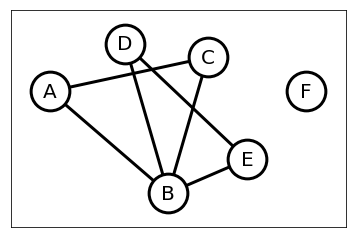

In [2]:
# Рисуем граф примерно как в слайдах

import matplotlib.pyplot as plt
%matplotlib inline

pos = {
    "A": (1, 1.5),
    "B": (4, 0),
    "C": (5, 2),
    "D": (2.9, 2.2),
    "E": (6, 0.5),
    "F": (7.5, 1.5),
}


def draw_graph():
    options = {
        "font_size": 20,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 3,
        "width": 3,
    }
    plt.axis([0, 8.5, -0.5, 2.7])
    nx.draw_networkx(graph, pos, **options)
    plt.show()


draw_graph()

In [3]:
# Проверяем достижимость

nx.has_path(graph, "A", "B")

True

In [4]:
# Проверяем связность

nx.is_connected(graph)

False

In [5]:
# Реализуем поиск в глубину

clock = 0
pre = {}
post = {}


def previsit(v):
    global clock
    pre[v] = clock
    clock += 1


def postvisit(v):
    global clock
    post[v] = clock
    clock += 1


visited = {}
for v in graph:
    visited[v] = False
    
    
def explore(v):
    visited[v] = True
    previsit(v)
    for u in graph[v]:
        if not visited[u]:
            explore(u)
    postvisit(v)
    

def dfs():
    for v in graph:
        if not visited[v]:
            explore(v)

In [6]:
dfs()

print(f"Pre:\t{sorted(pre.items())}")
print(f"Post:\t{sorted(post.items())}")

Pre:	[('A', 0), ('B', 1), ('C', 2), ('D', 4), ('E', 5), ('F', 10)]
Post:	[('A', 9), ('B', 8), ('C', 3), ('D', 7), ('E', 6), ('F', 11)]
